#### Importacion de librerias

In [491]:
# Uso General
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Metricas y utilidades
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

# Modelos
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

#### Importacion de datos

In [492]:
data = pd.read_csv("data.csv")
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


# Analisis de los datos

In [493]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     511 non-null    float64
 1   ZN       511 non-null    float64
 2   INDUS    511 non-null    float64
 3   CHAS     511 non-null    int64  
 4   NOX      511 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      511 non-null    float64
 7   DIS      511 non-null    float64
 8   RAD      511 non-null    int64  
 9   TAX      511 non-null    int64  
 10  PTRATIO  511 non-null    float64
 11  B        511 non-null    float64
 12  LSTAT    511 non-null    float64
 13  MEDV     511 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 56.0 KB


In [494]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,511.0,3.584139,8.564433,0.00632,0.082325,0.26169,3.621175,88.9762
ZN,511.0,11.252446,23.234838,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,511.0,11.151096,6.828175,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,511.0,0.068493,0.252838,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,511.0,0.554757,0.115310,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.287589,0.703802,3.56100,5.885500,6.20900,6.629750,8.7800
AGE,511.0,68.616243,28.099130,2.90000,45.050000,77.30000,94.050000,100.0000
DIS,511.0,3.783876,2.098631,1.12960,2.100350,3.15230,5.118000,12.1265
RAD,511.0,9.485323,8.688469,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,511.0,407.440313,167.903532,187.00000,279.500000,330.00000,666.000000,711.0000


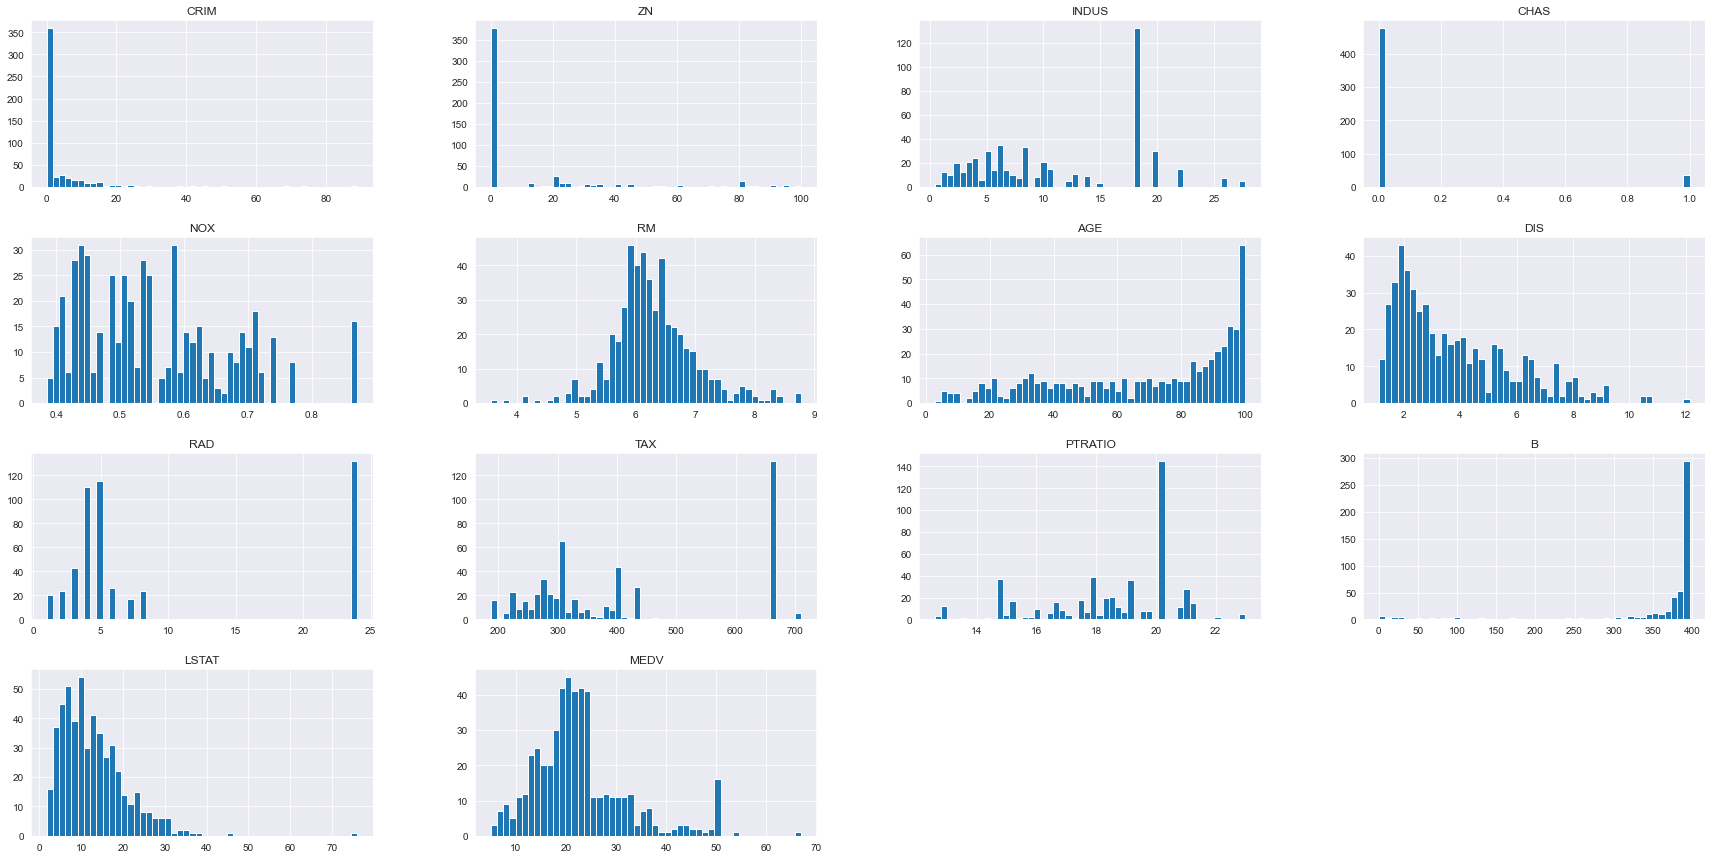

In [495]:
data.hist(bins=50, figsize=(30, 15))
plt.show()

In [496]:
corr_matrix = data.corr()
corr_matrix['CRIM'].sort_values(ascending=False)

CRIM       1.000000
RAD        0.625964
TAX        0.583389
NOX        0.420524
INDUS      0.405524
LSTAT      0.405030
AGE        0.350847
PTRATIO    0.276695
CHAS      -0.054906
ZN        -0.198451
RM        -0.220363
DIS       -0.377028
MEDV      -0.380072
B         -0.384356
Name: CRIM, dtype: float64

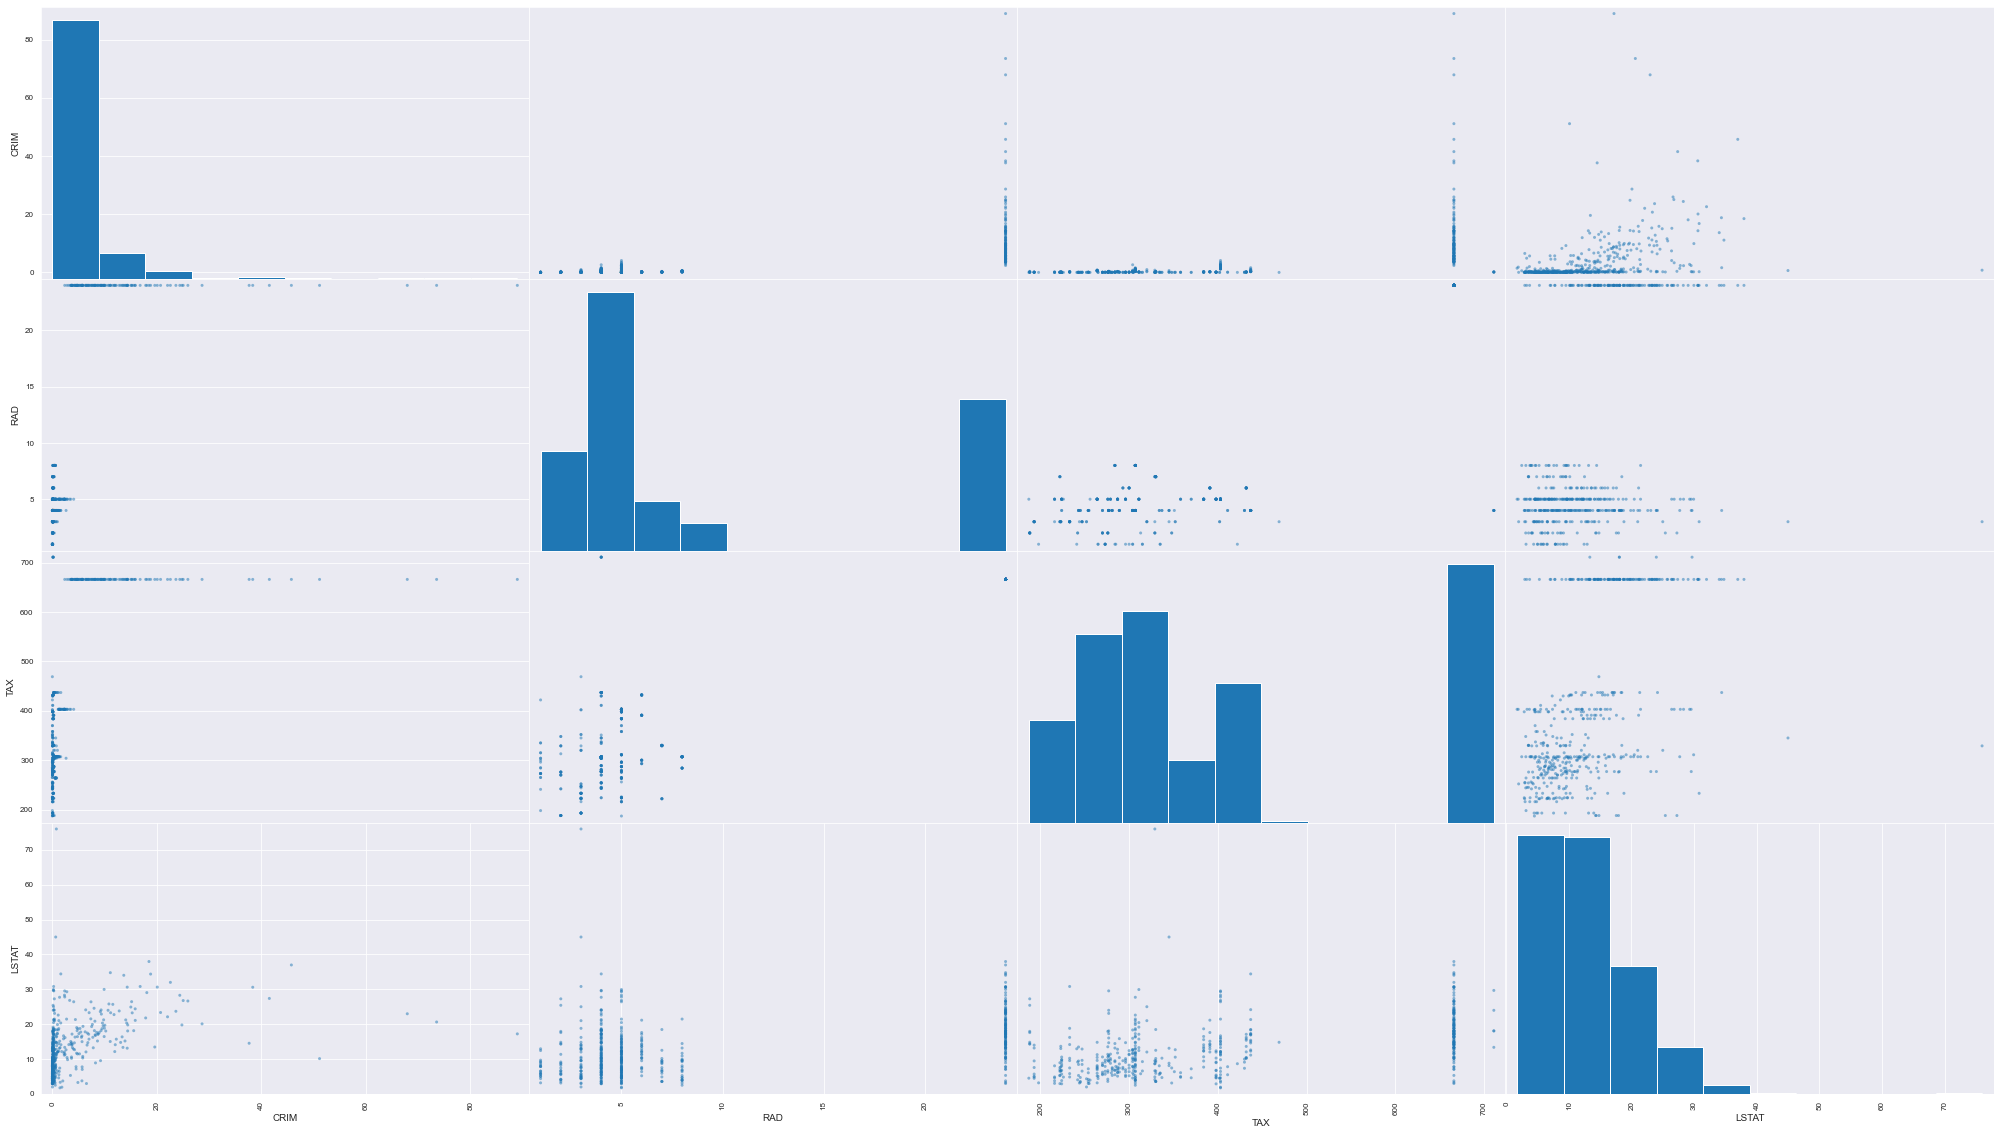

In [497]:
att = ["CRIM", "RAD", "TAX", "LSTAT"]
pd.plotting.scatter_matrix(data[att], figsize=(35, 20));

# Preparacion de los datos

In [498]:
data.drop(["CHAS"], axis=1, inplace=True)

## Eliminacion de outliers

In [499]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
ri = q3-q1
min_ = q1 - 3 * ri
max_ = q3 + 3 * ri
out_num = data[(data < min_)  | (data > max_)].count()
out_ratio = out_num/data.count()

outliers_i = pd.concat([out_num, out_ratio], axis=1)
outliers_i.columns = ['Count', 'Ratio']
outliers_i


,Count,Ratio
CRIM,34,0.066536
ZN,45,0.088063
INDUS,0,0.000000
NOX,0,0.000000
RM,1,0.001976
AGE,0,0.000000
DIS,0,0.000000
RAD,0,0.000000
TAX,0,0.000000
PTRATIO,0,0.000000


In [500]:
data_no_outliers = data[~((data < min_)  | (data > max_)).any(axis=1)]
data_no_outliers.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 371 entries, 0 to 510
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     371 non-null    float64
 1   ZN       371 non-null    float64
 2   INDUS    371 non-null    float64
 3   NOX      371 non-null    float64
 4   RM       366 non-null    float64
 5   AGE      371 non-null    float64
 6   DIS      371 non-null    float64
 7   RAD      371 non-null    int64  
 8   TAX      371 non-null    int64  
 9   PTRATIO  371 non-null    float64
 10  B        371 non-null    float64
 11  LSTAT    371 non-null    float64
 12  MEDV     371 non-null    float64
dtypes: float64(11), int64(2)
memory usage: 40.6 KB


## Llenado de valores nulos
En este caso, tenemos solo 5 valores nulos en la columna de LM
por lo que los llenaremos usando la mediana de la columna

In [501]:
data_no_outliers = data_no_outliers.fillna(data_no_outliers.median())

## Finalmente se escalan los datos

In [522]:
scaler = StandardScaler()

X = data_no_outliers.drop(columns=["CRIM"], axis=1)
y = data_no_outliers.CRIM.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Predicciones

## Test General
Se probaran varios modelos para determinar cual funcionara mejor para este caso

In [523]:
models = [('Sklearn Linear Regression', LinearRegression()),('XGBoost Regressor', XGBRegressor()), ('Sklearn Random Forest Regressor', RandomForestRegressor()), ("Sklearn Decision Tree Regressor", DecisionTreeRegressor())]
results = []

for model in models:
      # Se entrena el modelo
      model[1].fit(X_train, y_train)
      # Se predice con el df de test
      y_pred = model[1].predict(X_test)
      # Se guardan los resultados
      results.append([model[0], r2_score(y_pred, y_test), np.sqrt(mean_squared_error(y_test, y_pred))])

pd.DataFrame(data=results, columns=["Modelo", "R^2", "RMSE"]).sort_values("R^2", ascending=False).reset_index(drop=True)



,Modelo,R^2,RMSE
0,Sklearn Random Forest Regressor,0.848451,1.027120
1,Sklearn Decision Tree Regressor,0.845556,1.117119
2,XGBoost Regressor,0.756014,1.219039
3,Sklearn Linear Regression,0.736693,1.300584
